In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import shapiro as sh
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
data = pd.read_csv('all_data.csv')

## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [3]:
shapiro_test_dep = sh(data.dep_delay)
shapiro_test_dep
#failed to reject shapiro test

C:\Users\kevin\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=nan, pvalue=1.0)

<AxesSubplot:xlabel='dep_delay', ylabel='Count'>

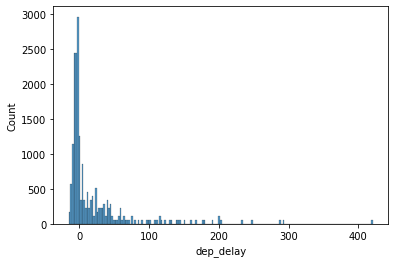

In [4]:
sns.histplot(data = data, x='dep_delay', log_scale = False)

In [5]:
shapiro_test_arr = sh(data.arr_delay)
shapiro_test_arr

C:\Users\kevin\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=nan, pvalue=1.0)

<AxesSubplot:xlabel='arr_delay', ylabel='Count'>

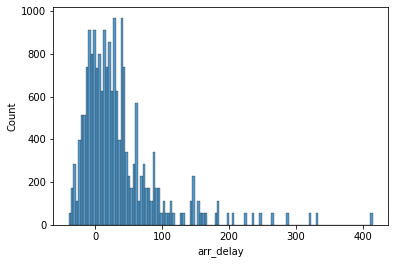

In [6]:
sns.histplot(data = data, x='arr_delay')

<AxesSubplot:xlabel='weather_delay', ylabel='Count'>

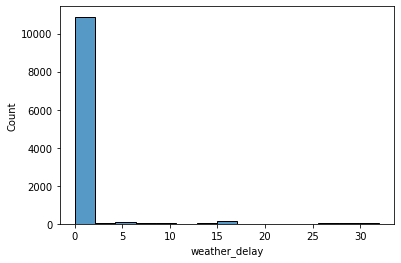

In [7]:
sns.histplot(data = data, x='weather_delay')

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [8]:
from datetime import datetime

In [9]:
flights_rand = pd.read_csv('flights_rand.csv')
flights_rand['fl_date'] = pd.to_datetime(flights_rand['fl_date'], errors='coerce')

In [10]:
flights_rand['month'] = flights_rand['fl_date'].dt.month

In [11]:
flights_rand['year'] = flights_rand['fl_date'].dt.year

In [12]:
yr_mon_dep_delay = flights_rand[['year','month', 'dep_delay']]

In [13]:
month_dep_delay = yr_mon_dep_delay[['dep_delay', 'month']].groupby('month').sum().reset_index()
month_dep_delay

month  dep_delay
0       1     6296.0
1       2    10327.0
2       3    10923.0
3       4     5694.0
4       5     8284.0
5       6    10370.0
6       7     9924.0
7       8    11906.0
8       9     3037.0
9      10     7142.0
10     11     6094.0
11     12     9550.0

In [14]:
yr_dep_delay = yr_mon_dep_delay[['dep_delay', 'year']].groupby('year').sum().reset_index()
yr_dep_delay

year  dep_delay
0  2018    44703.0
1  2019    54844.0

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [15]:
flights_rand['total_taxi'] = flights_rand['taxi_out']+flights_rand['taxi_in']

<AxesSubplot:xlabel='total_taxi', ylabel='dep_delay'>

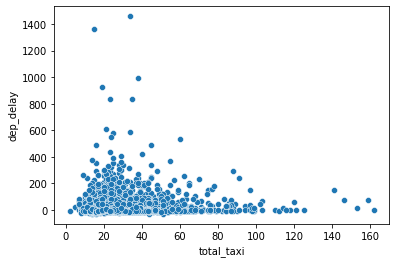

In [16]:
sns.scatterplot(data=flights_rand, x=flights_rand['total_taxi'], y=flights_rand['dep_delay'])

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [17]:
total_delay = flights_rand['arr_delay'] + flights_rand['dep_delay']

In [18]:
print('total delays from arrival delay is: ' + str(flights_rand['arr_delay'].sum()/total_delay.sum() * 100) + '%')

total delays from arrival delay is: 33.856580555891405%


#### **Task 6**: How many states cover 50% of US air traffic? 

In [19]:
destinations = flights_rand['dest_city_name'].str.rsplit(",", n=1, expand=True)

In [20]:
states = destinations.loc[:,1]

In [123]:
states.value_counts().head(5)

 CA    1118
 TX     991
 FL     759
 IL     600
 GA     566
Name: 1, dtype: int64

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

In [22]:
from scipy import stats

In [23]:
air_time = flights_rand['air_time']

In [24]:
dep_delay = flights_rand['dep_delay']

<AxesSubplot:xlabel='dep_delay', ylabel='air_time'>

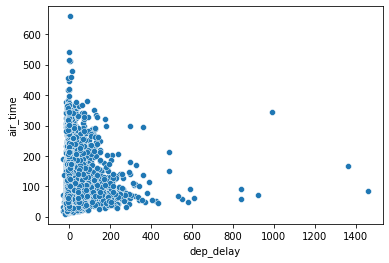

In [25]:
sns.scatterplot(data=flights_rand, x=dep_delay, y=air_time)

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

In [70]:
flights_rand['hour_departure'] = flights_rand['dep_time'].apply(lambda x: str(x)[:2] if len(str(x)) == 6 else (str(x)[:1]))

In [72]:
long = flights_rand[flights_rand['air_time'].between(400, 659)]

In [73]:
medium = flights_rand[flights_rand['air_time'].between(200,399)]

In [74]:
short = flights_rand[flights_rand['air_time'].between(0,199)]

In [82]:
commonhr_long = long.groupby('hour_departure').size().sort_values(ascending = False)
commonhr_long

hour_departure
16    3
9     2
19    2
10    2
7     1
15    1
dtype: int64

In [85]:
commonhr_medium = medium.groupby('hour_departure').size().sort_values(ascending = False)
commonhr_medium.head()

hour_departure
7     81
8     78
6     71
17    68
18    64
dtype: int64

In [86]:
commonhr_short = short.groupby('hour_departure').size().sort_values(ascending = False)
commonhr_short.head()

hour_departure
17    580
12    579
6     570
11    551
15    536
dtype: int64

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

In [114]:
busiest_air = flights_rand.groupby('dest').size().sort_values(ascending = False)
busiest_air

dest
ATL    529
ORD    485
DFW    392
DEN    340
LAX    314
      ... 
BTM      1
BRW      1
BQK      1
BPT      1
LBF      1
Length: 309, dtype: int64

In [107]:
passenger_rand = pd.read_csv('passenger_rand.csv')

In [108]:
pass_numb_dest = passenger_rand[['passengers', 'dest']].groupby('dest').sum().reset_index()

In [112]:
pass_numb_dest.sort_values(by = 'passengers', ascending = False)

dest  passengers
46   ATL   1178279.0
410  LAX    783884.0
540  ORD    764232.0
186  DEN    758319.0
187  DFW    708191.0
..   ...         ...
736  TKE         0.0
735  TIQ         0.0
503  MVW         0.0
733  TEX         0.0
421  LFT         0.0

[843 rows x 2 columns]

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

In [115]:
fuel = pd.read_csv('fuel.csv')

In [173]:
monthly_carrier_delay = flights_rand[['mkt_unique_carrier', 'dep_delay', 'month']].groupby(['mkt_unique_carrier', 'month']).agg({'dep_delay': 'mean'})
monthly_carrier_delay

dep_delay
mkt_unique_carrier month           
AA                 1      13.058537
                   2      10.502959
                   3       8.406780
                   4       7.514851
                   5      10.160643
...                             ...
WN                 8      10.738255
                   9       2.403361
                   10     10.167785
                   11     10.007812
                   12     12.229008

[123 rows x 1 columns]

In [174]:
monthly_carrier_dist = flights_rand[['mkt_unique_carrier', 'distance', 'month']].groupby(['mkt_unique_carrier', 'month']).sum()
monthly_carrier_dist

distance
mkt_unique_carrier month          
AA                 1      155274.0
                   2      118701.0
                   3      126485.0
                   4      141122.0
                   5      161679.0
...                            ...
WN                 8      118317.0
                   9       83061.0
                   10     108434.0
                   11      94190.0
                   12     101849.0

[123 rows x 1 columns]

In [182]:
numb_pass_carrier = passenger_rand[['passengers', 'unique_carrier']].groupby('unique_carrier').sum().sort_values(by = 'passengers', ascending = False)
numb_pass_carrier

passengers
unique_carrier            
WN               3794549.0
DL               3102969.0
AA               2950254.0
UA               2153180.0
OO                746327.0
...                    ...
8C                     0.0
NC                     0.0
VIQ                    0.0
N8                     0.0
5C                     0.0

[275 rows x 1 columns]

In [183]:
fuel_carrier = fuel[['total_cost', 'unique_carrier']].groupby('unique_carrier').sum().sort_values(by = 'total_cost', ascending = False)
fuel_carrier

total_cost
unique_carrier              
DL              3.286616e+10
AA              2.853022e+10
UA              2.786589e+10
WN              1.816020e+10
FX              9.372142e+09
...                      ...
9E              0.000000e+00
OH              0.000000e+00
CP              0.000000e+00
MQ              0.000000e+00
PRQ             0.000000e+00

[62 rows x 1 columns]

In [191]:
merged_delay = pd.merge(monthly_carrier_delay, monthly_carrier_dist, how = 'left', on = ['mkt_unique_carrier', 'month']).reset_index()
merged_delay

mkt_unique_carrier  month  dep_delay  distance
0                   AA      1  13.058537  155274.0
1                   AA      2  10.502959  118701.0
2                   AA      3   8.406780  126485.0
3                   AA      4   7.514851  141122.0
4                   AA      5  10.160643  161679.0
..                 ...    ...        ...       ...
118                 WN      8  10.738255  118317.0
119                 WN      9   2.403361   83061.0
120                 WN     10  10.167785  108434.0
121                 WN     11  10.007812   94190.0
122                 WN     12  12.229008  101849.0

[123 rows x 4 columns]

In [205]:
merged_delay_renamed = merged_delay.rename(columns={"mkt_unique_carrier": "unique_carrier"})

In [194]:
carrier_merged = pd.merge(numb_pass_carrier, fuel_carrier, how = 'left', on = 'unique_carrier').reset_index()
carrier_merged['']

unique_carrier  passengers    total_cost
0               WN   3794549.0  1.816020e+10
1               DL   3102969.0  3.286616e+10
2               AA   2950254.0  2.853022e+10
3               UA   2153180.0  2.786589e+10
4               OO    746327.0  8.201462e+08
..             ...         ...           ...
270             8C         0.0  9.845029e+07
271             NC         0.0  5.193080e+07
272            VIQ         0.0           NaN
273             N8         0.0  1.360050e+08
274             5C         0.0           NaN

[275 rows x 3 columns]

In [212]:
fuel_pass = pd.merge(merged_delay_renamed, carrier_merged, how = 'right', on = 'unique_carrier')
fuel_pass

unique_carrier  month  dep_delay  distance  passengers    total_cost
0               AA    1.0  13.058537  155274.0   2950254.0  2.853022e+10
1               AA    2.0  10.502959  118701.0   2950254.0  2.853022e+10
2               AA    3.0   8.406780  126485.0   2950254.0  2.853022e+10
3               AA    4.0   7.514851  141122.0   2950254.0  2.853022e+10
4               AA    5.0  10.160643  161679.0   2950254.0  2.853022e+10
..             ...    ...        ...       ...         ...           ...
382             8C    NaN        NaN       NaN         0.0  9.845029e+07
383             NC    NaN        NaN       NaN         0.0  5.193080e+07
384            VIQ    NaN        NaN       NaN         0.0           NaN
385             N8    NaN        NaN       NaN         0.0  1.360050e+08
386             5C    NaN        NaN       NaN         0.0           NaN

[387 rows x 6 columns]

In [216]:
fuel_pass.sort_values(by = 'total_cost', ascending = False)

unique_carrier  month  dep_delay  distance  passengers    total_cost
42              DL    7.0  11.091324  164205.0   3102969.0  3.286616e+10
36              DL    1.0  10.620915  106087.0   3102969.0  3.286616e+10
47              DL   12.0   8.201005  145169.0   3102969.0  3.286616e+10
46              DL   11.0  11.502959  114207.0   3102969.0  3.286616e+10
45              DL   10.0   4.603896  107554.0   3102969.0  3.286616e+10
..             ...    ...        ...       ...         ...           ...
379             O6    NaN        NaN       NaN         0.0           NaN
380             6R    NaN        NaN       NaN         0.0           NaN
381            1TQ    NaN        NaN       NaN         0.0           NaN
384            VIQ    NaN        NaN       NaN         0.0           NaN
386             5C    NaN        NaN       NaN         0.0           NaN

[387 rows x 6 columns]

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

In [251]:
avg_fuel = (fuel_pass.groupby(['unique_carrier', 'month']).agg(np.mean).reset_index().fillna(0).assign(
    
    cost_per_km = lambda x: x['total_cost'] / x['distance']
    ).assign(
    
    cost_per_passenger = lambda x: x['total_cost'] / x['passengers']
    )
).fillna(0)
#.sort_values(by = 'cost_per_passenger', ascending = False)
avg_fuel

unique_carrier  month  dep_delay  distance  passengers    total_cost  \
0               AA    1.0  13.058537  155274.0   2950254.0  2.853022e+10   
1               AA    2.0  10.502959  118701.0   2950254.0  2.853022e+10   
2               AA    3.0   8.406780  126485.0   2950254.0  2.853022e+10   
3               AA    4.0   7.514851  141122.0   2950254.0  2.853022e+10   
4               AA    5.0  10.160643  161679.0   2950254.0  2.853022e+10   
..             ...    ...        ...       ...         ...           ...   
118             WN    8.0  10.738255  118317.0   3794549.0  1.816020e+10   
119             WN    9.0   2.403361   83061.0   3794549.0  1.816020e+10   
120             WN   10.0  10.167785  108434.0   3794549.0  1.816020e+10   
121             WN   11.0  10.007812   94190.0   3794549.0  1.816020e+10   
122             WN   12.0  12.229008  101849.0   3794549.0  1.816020e+10   

       cost_per_km  cost_per_passenger  
0    183741.104860         9670.427128  
1    240353.630686         9670.427128  
2    225562.053334         9670.427128  
3    202167.035019         9670.427128  
4    176462.102784         9670.427128  
..             ...                 ...  
118  153487.644506         4785.864574  
119  218636.876934         4785.864574  
120  167476.968801         4785.864574  
121  192803.881888         4785.864574  
122  178305.114778         4785.864574  

[123 rows x 8 columns]

<AxesSubplot:xlabel='dep_delay', ylabel='cost_per_passenger'>

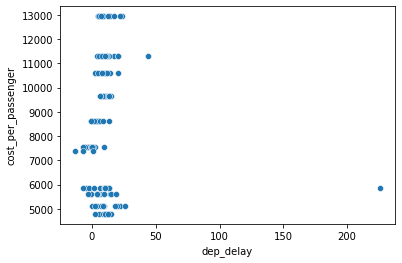

In [260]:
sns.scatterplot(data = avg_fuel, x = 'dep_delay', y = 'cost_per_passenger')

<AxesSubplot:xlabel='dep_delay', ylabel='cost_per_km'>

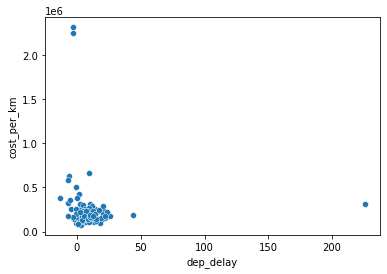

In [261]:
sns.scatterplot(data = avg_fuel, x = 'dep_delay', y = 'cost_per_km')

In [245]:
import seaborn as sns

<AxesSubplot:ylabel='Density'>

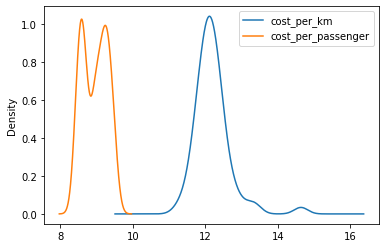

In [255]:
avg_fuel_cost = np.log1p(avg_fuel[['cost_per_km', 'cost_per_passenger']])
avg_fuel_cost.plot.kde()